# Project Two: Logistic Regression and Random Forests

For Project Two, you have been asked to create different models analyzing a Heart Disease data set. Before beginning work on the project, be sure to read through the Project Two Guidelines and Rubric to understand what you need to do and how you will be graded on this assignment. Be sure to carefully review the Project Two Summary Report template, which contains all of the questions that you will need to answer about the regression analyses you are performing.

For this project, you will be writing all the scripts yourself. You may reference the textbook and your previous work on the problem sets to help you write the scripts.


### Scenario

You are a data analyst researching risk factors for heart disease at a university hospital. You have access to a large set of historical data that you can use to analyze patterns between different health indicators (e.g. fasting blood sugar, maximum heart rate, etc.) and the presence of heart disease. You have been asked to create different logistic regression models that predict whether or not a person is at risk for heart disease. A model like this could eventually be used to evaluate medical records and look for risks that might not be obvious to human doctors. You have also been asked to create a classification random forest model to predict the risk of heart disease and a regression random forest model to predict the maximum heart rate achieved.

There are several variables in this data set, but you will be working with the following important variables: 

| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> age </div> | <div style="text-align: left"> The person's age in years </div> |
| <div style="text-align: left"> sex </div> | <div style="text-align: left"> The person's sex (1 = male, 0 = female) </div> |
| <div style="text-align: left"> cp </div> | <div style="text-align: left"> The type of chest pain experienced (0=no pain, 1=typical angina, 2=atypical angina, 3=non-anginal pain) </div> |
| <div style="text-align: left"> trestbps </div> | <div style="text-align: left"> The person's resting blood pressure </div> |
| <div style="text-align: left"> chol </div> | <div style="text-align: left"> The person's cholesterol measurement in mg/dl </div> |
| <div style="text-align: left"> fbs </div> | <div style="text-align: left"> The person's fasting blood sugar is greater than 120 mg/dl (1 = true, 0 = false) </div> |
| <div style="text-align: left"> restecg </div> | <div style="text-align: left"> Resting electrocardiographic measurement (0=normal, 1=having ST-T wave abnormality, 2=showing probable or definite left ventricular hypertrophy by Estes' criteria) </div> |
| <div style="text-align: left"> thalach </div> | <div style="text-align: left"> The person's maximum heart rate achieved </div> |
| <div style="text-align: left"> exang </div> | <div style="text-align: left"> Exercise-induced angina (1=yes, 0=no) </div> |
| <div style="text-align: left"> oldpeak </div> | <div style="text-align: left"> ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot) </div> |
| <div style="text-align: left"> slope </div> | <div style="text-align: left"> The slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping) </div> |
| <div style="text-align: left"> ca </div> | <div style="text-align: left"> The number of major vessels (0-3) </div> |
| <div style="text-align: left"> target </div> | <div style="text-align: left"> Heart disease (0=no, 1=yes) </div> |

**---------------------------------------------------------------------------------------------------------------------------**

## Install Libraries
In the following code block, you will install appropriate libraries to use in this project. 

Click the **Run** button on the toolbar to run this code.
<br><br>
<font color='red'>**Note:** The code section below will first install three R packages: "ResourceSelection", "pROC" and "rpart.plot". Please do not move to the next step until the packages are fully installed. This will take some time. Once the installation is complete, this step will print first 6 rows of the data set.</font>

In [12]:
print("This step will first install three R packages. Please wait until the packages are fully installed.")
print("Once the installation is complete, this step will print 'Installation complete!'")

install.packages("ResourceSelection")
install.packages("pROC")
install.packages("rpart.plot")

print("Installation complete!")

[1] "This step will first install three R packages. Please wait until the packages are fully installed."
[1] "Once the installation is complete, this step will print 'Installation complete!'"


Installing package into '/home/codio/R/x86_64-pc-linux-gnu-library/3.4'
(as 'lib' is unspecified)
Installing package into '/home/codio/R/x86_64-pc-linux-gnu-library/3.4'
(as 'lib' is unspecified)
Installing package into '/home/codio/R/x86_64-pc-linux-gnu-library/3.4'
(as 'lib' is unspecified)


[1] "Installation complete!"


## Prepare Your Data Set

In the following code block, you have been given the R code to prepare your data set.

Click the **Run** button on the toolbar to run this code.

In [28]:
heart_data <- read.csv(file="heart_disease.csv", header=TRUE, sep=",")

# Converting appropriate variables to factors  
heart_data <- within(heart_data, {
   target <- factor(target)
   sex <- factor(sex)
   cp <- factor(cp)
   fbs <- factor(fbs)
   restecg <- factor(restecg)
   exang <- factor(exang)
   slope <- factor(slope)
   ca <- factor(ca)
   thal <- factor(thal)
})

head(heart_data, 10)

print("Number of variables")
ncol(heart_data)

print("Number of rows")
nrow(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
59,1,2,126,218,1,1,134,0,2.2,1,1,1,0


[1] "Number of variables"


[1] 14

[1] "Number of rows"


[1] 303

## Model #1 - First Logistic Regression Model

You have been asked to create a logistic regression model for heart disease *(target)* using the variables age *(age)*, resting blood pressure *(trestbps)*, exercised induced angina (exang) and maximum heart rate achieved *(thalach)*. Before writing any code, review Section 3 of the Summary Report template to see the questions you will be answering about your logistic regression model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

In [29]:
logit1 <- glm(target ~ age + trestbps + exang + thalach, data = heart_data, family = "binomial")
summary(logit1)


Call:
glm(formula = target ~ age + trestbps + exang + thalach, family = "binomial", 
    data = heart_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0935  -0.7944   0.4954   0.8133   2.2343  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.021121   1.784194  -0.572   0.5671    
age         -0.017549   0.017144  -1.024   0.3060    
trestbps    -0.014888   0.008337  -1.786   0.0741 .  
exang1      -1.624981   0.305774  -5.314 1.07e-07 ***
thalach      0.031095   0.007275   4.274 1.92e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 323.14  on 298  degrees of freedom
AIC: 333.14

Number of Fisher Scoring iterations: 4


In [30]:
library(ResourceSelection)
print("GOF test")
hl1 = hoslem.test(logit1$y, fitted(logit1), g=50)
hl1

[1] "GOF test"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  logit1$y, fitted(logit1)
X-squared = 44.622, df = 48, p-value = 0.612


In [31]:
print("Confusion Matrix")
predicted <- ifelse(predict(logit1, type = "response") >= 0.5, 1, 0)
table(Predicted = predicted, Actual = heart_data$target)

[1] "Confusion Matrix"


         Actual
Predicted   0   1
        0  89  31
        1  49 134

Setting levels: control = 0, case = 1
Setting direction: controls < cases


[1] "Area Under the Curve (AUC)"


[1] 0.8007

[1] "ROC Curve"


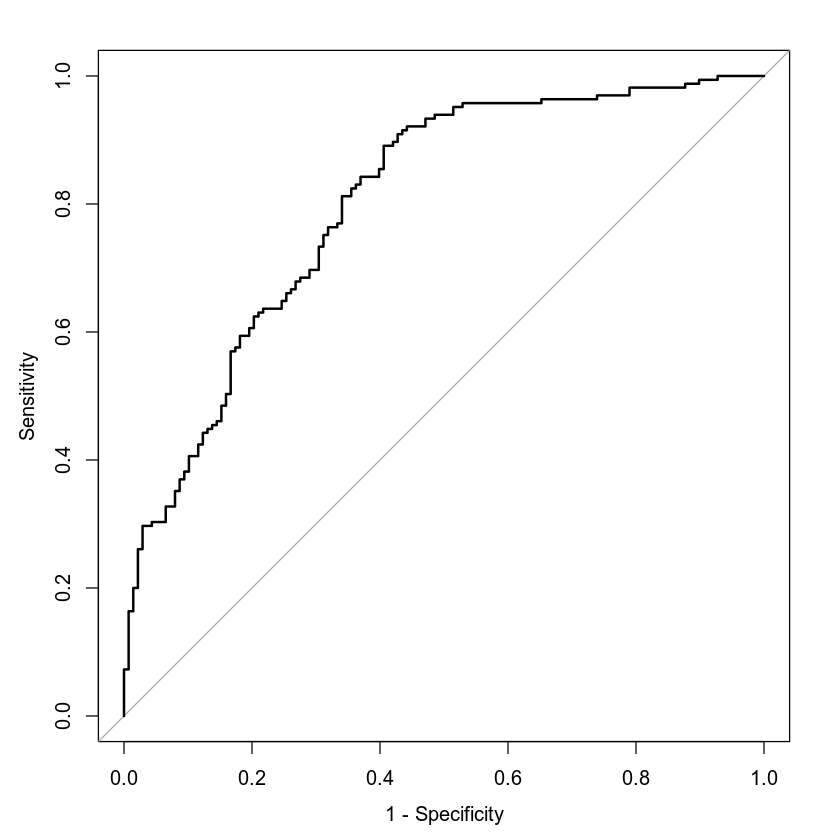

In [32]:
library(pROC)
labels <- heart_data$target
predictions <- logit1$fitted.values
roc <- roc(labels, predictions)

print("Area Under the Curve (AUC)")
round(auc(roc),4)

print("ROC Curve")
plot(roc, legacy.axes = TRUE)

In [33]:
print("Prediction: 50 years old, blood pressure 122, has exang, and max heart rate of 140")
new_df <- data.frame(age=50, trestbps=122, exang='1', thalach=140)
prediction <- predict(logit1, new_df, type='response')
round(prediction, 4)

print("Prediction: 50 years old, blood presuure=130, no exang, and max heart rate of 165")
new_df <- data.frame(age=50, trestbps=130, exang='0', thalach=165)
prediction <- predict(logit1, new_df, type='response')
round(prediction, 4)

[1] "Prediction: 50 years old, blood pressure 122, has exang, and max heart rate of 140"


1 
0.2716

[1] "Prediction: 50 years old, blood presuure=130, no exang, and max heart rate of 165"


1 
0.7853

## Model #2 - Second Logistic Regression Model

You have been asked to create a logistic regression model for heart disease *(target)* using the variables age of the individual *(age)*, resting blood pressure (trestbps), type of chest pain *(cp)* and maximum heart rate achieved *(thalach)*. You also have to include the quadratic term for age and the interaction term between age and maximum heart rate achieved. Before writing any code, review Section 4 of the Summary Report template to see the questions you will be answering about your model.

Run your scripts to get the outputs of your analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

In [34]:
logit2 <- glm(target ~ age + trestbps + cp + thalach + I(age^2) + age:thalach, data = heart_data, family = "binomial")
summary(logit2)


Call:
glm(formula = target ~ age + trestbps + cp + thalach + I(age^2) + 
    age:thalach, family = "binomial", data = heart_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6961  -0.7537   0.2925   0.7123   2.3058  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.556e+01  1.054e+01  -1.476  0.13988    
age          1.744e-01  2.669e-01   0.653  0.51357    
trestbps    -1.958e-02  8.978e-03  -2.181  0.02916 *  
cp1          1.913e+00  4.437e-01   4.313 1.61e-05 ***
cp2          2.037e+00  3.473e-01   5.867 4.45e-09 ***
cp3          1.777e+00  5.477e-01   3.245  0.00117 ** 
thalach      1.363e-01  5.119e-02   2.663  0.00775 ** 
I(age^2)     8.424e-04  1.750e-03   0.481  0.63025    
age:thalach -1.867e-03  8.909e-04  -2.095  0.03616 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual d

In [35]:
library(ResourceSelection)
print("GOF test model 2")
hl1 = hoslem.test(logit2$y, fitted(logit2), g=50)
hl1

[1] "GOF test model 2"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  logit2$y, fitted(logit2)
X-squared = 52, df = 48, p-value = 0.3209


In [36]:
print("Confusion Matrix model 2")
predicted <- ifelse(predict(logit2, type = "response") >= 0.5, 1, 0)
table(Predicted = predicted, Actual = heart_data$target)

[1] "Confusion Matrix model 2"


         Actual
Predicted   0   1
        0 102  36
        1  36 129

Setting levels: control = 0, case = 1
Setting direction: controls < cases


[1] "Area Under the Curve (AUC)"


[1] 0.8478

[1] "ROC Curve"


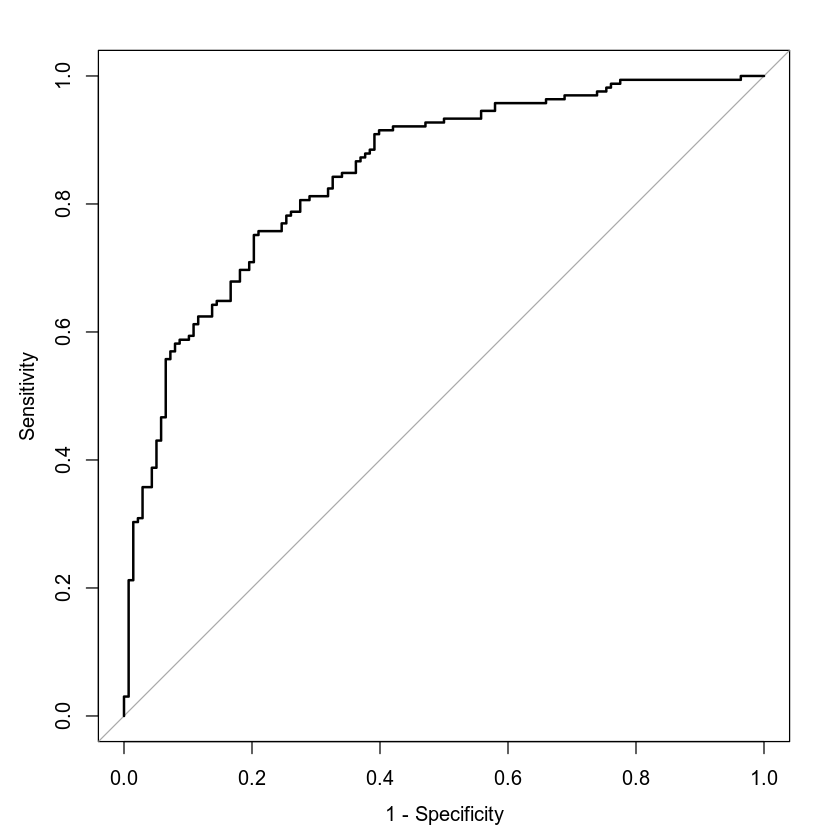

In [37]:
library(pROC)
labels <- heart_data$target
predictions <- logit2$fitted.values
roc <- roc(labels, predictions)

print("Area Under the Curve (AUC)")
round(auc(roc),4)

print("ROC Curve")
plot(roc, legacy.axes = TRUE)

In [38]:
print("Prediction: 50 years old, blood pressure 115, no chest pain, max heart rate of 133")
new_df <- data.frame(age=50, trestbps=115, cp='0', thalach=133)
prediction <- predict(logit2, new_df, type='response')
round(prediction, 4)

print("Prediction: 50 years old, blood presuure 125, cp=1, max heart rate of 155")
new_df <- data.frame(age=50, trestbps=125, cp='1', thalach=155)
prediction <- predict(logit2, new_df, type='response')
round(prediction, 4)

[1] "Prediction: 50 years old, blood pressure 115, no chest pain, max heart rate of 133"


1 
0.2188

[1] "Prediction: 50 years old, blood presuure 125, cp=1, max heart rate of 155"


1 
0.8007

## Random Forest Classification Model

You have been asked to create a random forest classification model for the presence of heart disease *(target)* using the variables age *(age)*, sex *(sex)*, chest pain type *(cp)*, resting blood pressure *(trestbps)*, cholesterol measurement *(chol)*, resting electrocardiographic measurement *(restecg)*, exercise-induced angina *(exang)*, and number of major vessels *(ca)*. Before writing any code, review Section 5 of the Summary Report template to see the questions you will be answering about your model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

In [39]:
set.seed(6522048)

sample.size = floor(0.85*nrow(heart_data))

print("Total rows")
print(nrow(heart_data))

print("traning rows")
train = sample(seq_len(nrow(heart_data)), size = sample.size)
training.data = heart_data[train,]
nrow(training.data)

print("Testing rows")
testing.data <- heart_data[-train, ]
nrow(testing.data)

[1] "Total rows"
[1] 303
[1] "traning rows"


[1] 257

[1] "Testing rows"


[1] 46

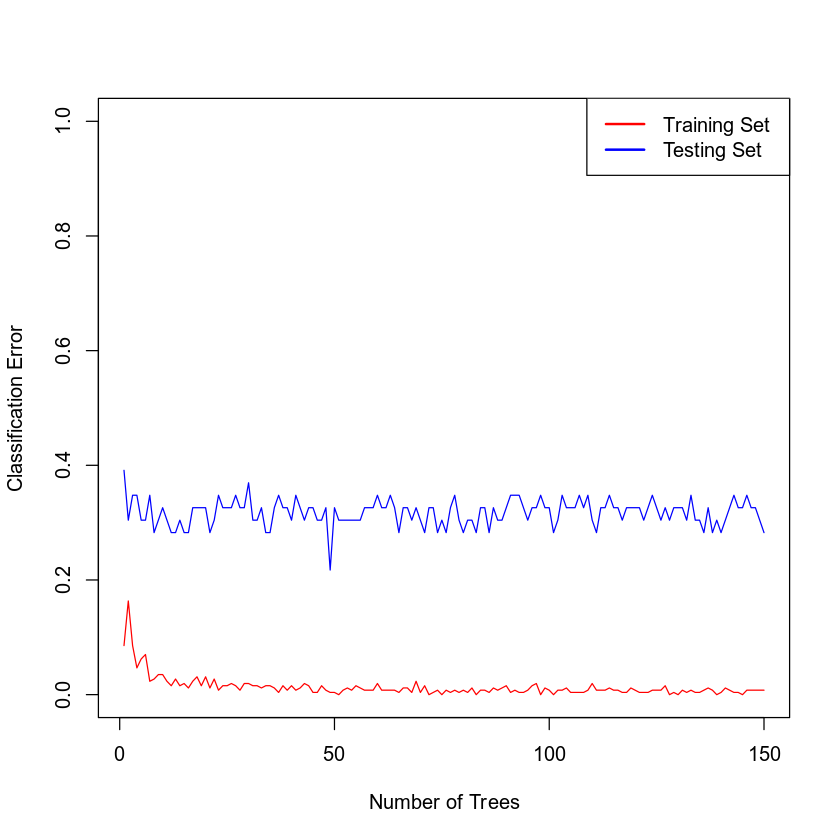

In [40]:
set.seed(6522048)
library(randomForest)

train_error_vec <- c()
test_error_vec <- c()
trees <- c()

for (i in 1:150) {
    trees <- c(trees, i)
    
    # Fit model with i trees
    model_rf <- randomForest(
        target ~ age + sex + cp + trestbps + chol + restecg + exang + ca, 
        data = training.data, 
        ntree = i
    )
    
    # Training set predictions
    train_pred <- predict(model_rf, training.data, type = "class")
    conf_train <- table(training.data$target, train_pred)
    train_error <- 1 - (sum(diag(conf_train)) / sum(conf_train))
    train_error_vec <- c(train_error_vec, train_error)
    
    # Testing set predictions
    test_pred <- predict(model_rf, testing.data, type = "class")
    conf_test <- table(testing.data$target, test_pred)
    test_error <- 1 - (sum(diag(conf_test)) / sum(conf_test))
    test_error_vec <- c(test_error_vec, test_error)
}

# Plot
plot(trees, train_error_vec, type = "l", ylim = c(0, 1), col = "red", 
     xlab = "Number of Trees", ylab = "Classification Error")
lines(trees, test_error_vec, col = "blue")
legend("topright", legend = c("Training Set", "Testing Set"), col = c("red", "blue"), lwd = 2)


In [41]:
best_index <- which.min(train_error_vec)
best_num_trees <- trees[best_index]
best_num_trees

[1] 51

### Random Forest Classification Model (51 trees)

In [64]:
set.seed(6522048) # random forest with 51 trees
library(randomForest)
model_RF1 <- randomForest(target ~ age + sex + cp + trestbps + chol + restecg + exang + ca, data=training.data, ntree=51)

In [65]:
# Confusion matrix for training set
print("Matrix for training set 51 trees")
train_pred <- predict(model_RF1, training.data, type = "class")
train_conf <- table(Actual = training.data$target, Predicted = train_pred)
train_conf

# Confusion matrix for testing set
print("Matrix for testing set 51 trees")
test_pred <- predict(model_RF1, testing.data, type = "class")
test_conf <- table(Actual = testing.data$target, Predicted = test_pred)
test_conf

[1] "Matrix for training set 51 trees"


      Predicted
Actual   0   1
     0 112   2
     1   0 128

[1] "Matrix for testing set 51 trees"


      Predicted
Actual  0  1
     0 15  9
     1  8 29

### Random Forest Classification Model (51 trees and mtry=2 and limiting max nodes and nodessize)

In [44]:
set.seed(6522048) # Random forest with 25 trees and mtry=2 and limiting max nodes and nodessize
library(randomForest)
model_RF1 <- randomForest(target ~ age + sex + cp + trestbps + chol + restecg + exang + ca, data=training.data, mtry=2, ntree=51, maxnodes = 10, nodesize = 5)

In [45]:
# Confusion matrix for training set
print("Matrix for training set 51 trees w/ limitations")
train_pred <- predict(model_RF1, training.data, type = "class")
train_conf <- table(Actual = training.data$target, Predicted = train_pred)
train_conf

# Confusion matrix for testing set
print("Matrix for testing set 51 trees w/ limitations")
test_pred <- predict(model_RF1, testing.data, type = "class")
test_conf <- table(Actual = testing.data$target, Predicted = test_pred)
test_conf

[1] "Matrix for training set 51 trees w/ limitations"


      Predicted
Actual   0   1
     0 100  20
     1  10 127

[1] "Matrix for testing set 51 trees w/ limitations"


      Predicted
Actual  0  1
     0 11  7
     1  8 20

## Random Forest Regression Model

You have been asked to create a random forest regression model for maximum heart rate achieved using the variables age *(age)*, sex *(sex)*, chest pain type *(cp)*, resting blood pressure *(trestbps)*, cholesterol measurement *(chol)*, resting electrocardiographic measurement *(restecg)*, exercise-induced angina *(exang)*, and number of major vessels *(ca)*. Before writing any code, review Section 6 of the Summary Report template to see the questions you will be answering about your model.

Run your scripts to get the outputs of your analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

In [46]:
set.seed(6522048)

sample.size = floor(0.80*nrow(heart_data))

print("traning rows regression forest")
train = sample(seq_len(nrow(heart_data)), size = sample.size)
training.data = heart_data[train,]
nrow(training.data)

print("Testing rows regression forest")
testing.data <- heart_data[-train, ]
nrow(testing.data)

[1] "traning rows regression forest"


[1] 242

[1] "Testing rows regression forest"


[1] 61

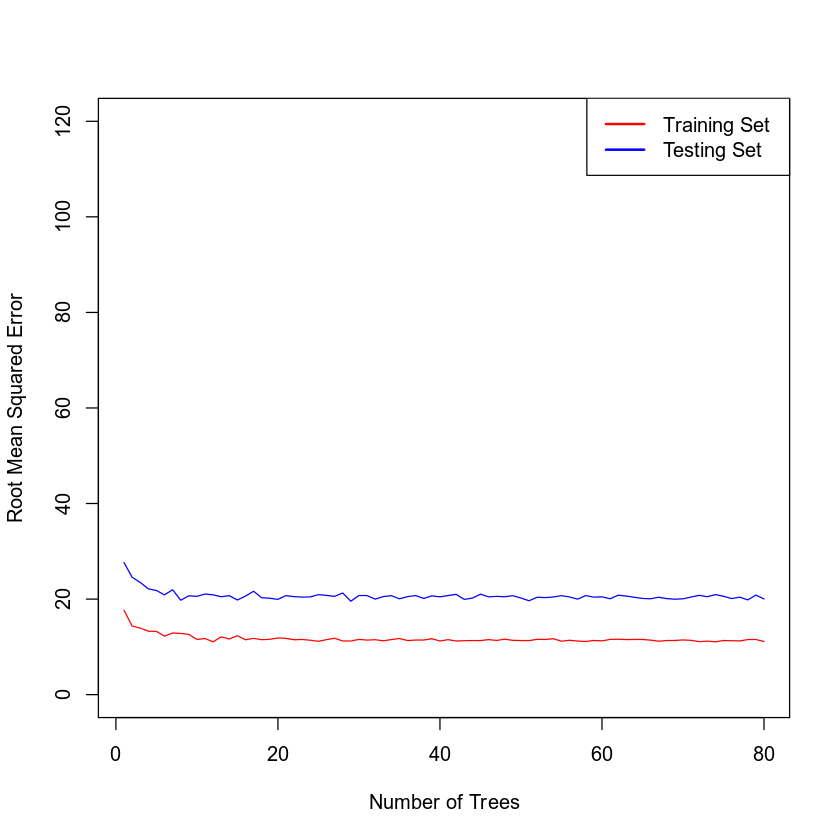

In [47]:
set.seed(6522048)
library(randomForest)

# RMSE function
RMSE <- function(pred, obs) {
  sqrt(sum((pred - obs)^2) / length(pred))
}

train_rmse <- c()
test_rmse <- c()
trees <- c()

for (i in 1:80) {
  trees <- c(trees, i)
  
  # Fit regression random forest
  model_rf <- randomForest(thalach ~ age + sex + cp + trestbps + chol + restecg + exang + ca,
                            data = training.data,
                            ntree = i)
  
  # Training RMSE
  pred_train <- predict(model_rf, newdata = training.data)
  rmse_train <- RMSE(pred_train, training.data$thalach)
  train_rmse <- c(train_rmse, rmse_train)
  
  # Testing RMSE
  pred_test <- predict(model_rf, newdata = testing.data)
  rmse_test <- RMSE(pred_test, testing.data$thalach)
  test_rmse <- c(test_rmse, rmse_test)
}

# Plot RMSE vs number of trees
plot(trees, train_rmse, type = "l", ylim = c(0, 120), col = "red",
     xlab = "Number of Trees", ylab = "Root Mean Squared Error")
lines(trees, test_rmse, col = "blue")
legend("topright", legend = c("Training Set", "Testing Set"), col = c("red", "blue"), lwd = 2)


### Random Forest Regression Model (20 trees)

In [48]:
set.seed(6522048)
library(randomForest)
model_rf <- randomForest(thalach ~ age + sex + cp + trestbps + chol + restecg + exang + ca,
                            data = training.data,
                            ntree = 20)

# Root mean squared error
RMSE = function(pred, obs) {
    return(sqrt( sum( (pred - obs)^2 )/length(pred) ) )
}

print('Root Mean Squared Error training set 20 trees')
pred <- predict(model_rf, newdata=training.data, type='response')
RMSE(pred, training.data$thalach)


print('Root Mean Squared Error testing set 20 trees')
pred <- predict(model_rf, newdata=testing.data, type='response')
RMSE(pred, testing.data$thalach)

[1] "Root Mean Squared Error training set 20 trees"


[1] 11.62816

[1] "Root Mean Squared Error testing set 20 trees"


[1] 21.11394

### Random Forest Regression Model (20 tress and limits)

In [49]:
set.seed(6522048)
library(randomForest)
model_rf <- randomForest(thalach ~ age + sex + cp + trestbps + chol + restecg + exang + ca,
                            data = training.data,
                            ntree = 20, mtry=3, maxnodes=15, nodesize=15)

# Root mean squared error
RMSE = function(pred, obs) {
    return(sqrt( sum( (pred - obs)^2 )/length(pred) ) )
}

print('Root Mean Squared Error training set 20 trees and limits')
pred <- predict(model_rf, newdata=training.data, type='response')
RMSE(pred, training.data$thalach)


print('Root Mean Squared Error testing set 20 trees and limits')
pred <- predict(model_rf, newdata=testing.data, type='response')
RMSE(pred, testing.data$thalach)

[1] "Root Mean Squared Error training set 20 trees and limits"


[1] 16.06502

[1] "Root Mean Squared Error testing set 20 trees and limits"


[1] 19.36515

In [66]:
mean(heart_data$thalach)

[1] 149.6469

In [67]:
range(heart_data$thalach)

[1]  71 202

## End of Project Two Jupyter Notebook
The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all of the questions in the Summary Report template for Project Two, and to include your completed Jupyter Notebook scripts as part of your submission.